In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('drive/MyDrive/Data Sets/insurance.csv' , delimiter=',')
# df.head

In [5]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#Visulize Data

<BarContainer object of 1338 artists>

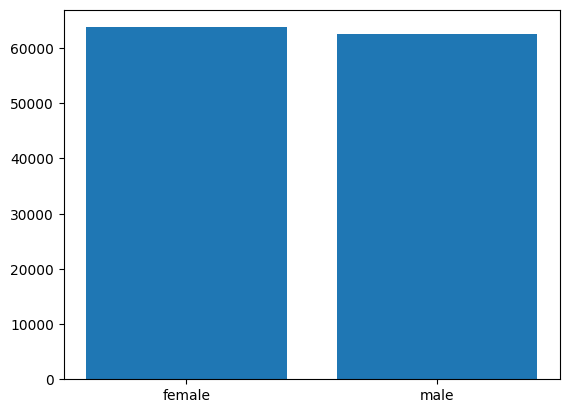

In [44]:
plt.bar(df["sex"] , df['charges'])

Text(0.5, 1.0, 'Age Distribution')

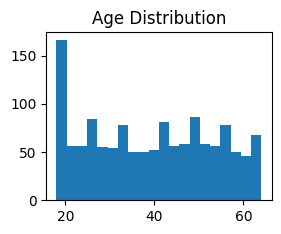

In [33]:
# Numerical features distribution
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')

Text(0.5, 1.0, 'BMI Distribution')

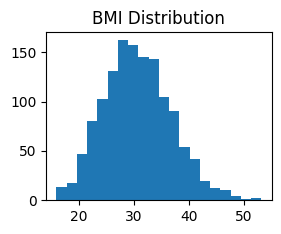

In [36]:
plt.subplot(2, 2, 2)
plt.hist(df['bmi'], bins=20)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Children Count')

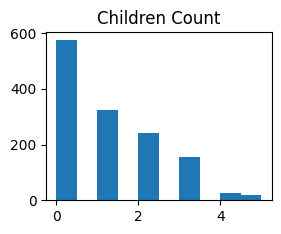

In [42]:
plt.subplot(2, 2, 3)
plt.hist(df['children'], bins=10)
plt.title('Children Count')

Text(0.5, 1.0, 'Charges Distribution')

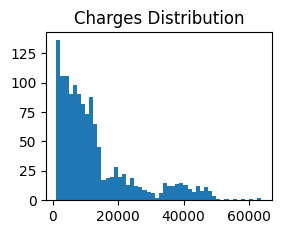

In [46]:
plt.subplot(2, 2, 4)
plt.hist(df['charges'], bins=20)
plt.title('Charges Distribution')

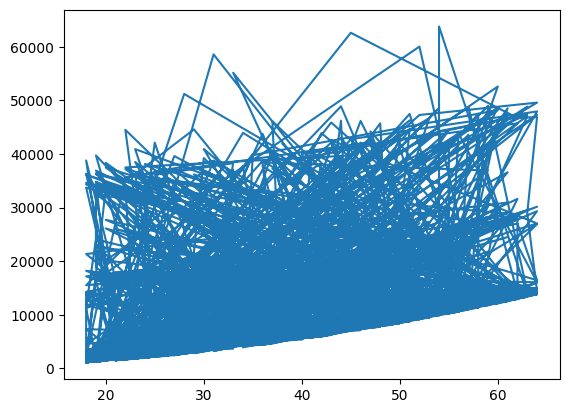

In [49]:
plt.plot(df['age'] , df['charges'])

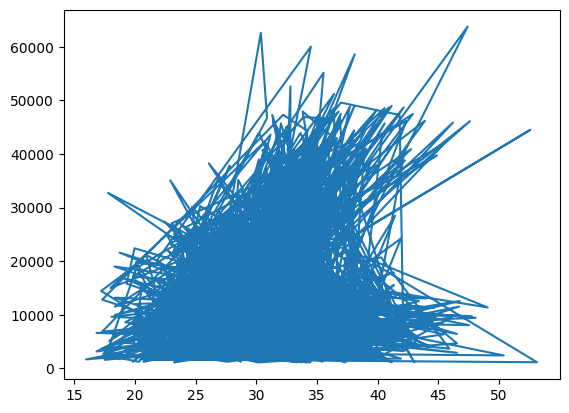

In [51]:
plt.plot(df['bmi'] , df['charges'])

#Splitting


* Q: Split the data into test (30%), train (60%), and validation (10%). Randomize/Shuffle the data and visualize it.

In [43]:
from sklearn.model_selection import train_test_split

x = df[["smoker" , "age" , "sex" , "bmi" , "children"]]
y = df[['charges']]

#  70% train and 30% test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42 )


# now 10%validation and 60% train
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=1/7 , random_state=42)

print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))
y_test

Training set size: 802
Validation set size: 134
Test set size: 402


,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
701,9541.69555
672,4399.73100
1163,2200.83085
1103,11363.28320


#Scaling

*  Use StandardScaler and MinMaxScaler from sklearn.preprocessing to scale the numerical features (e.g., age, bmi, charges).
Visualize the effect of both scaling techniques using histograms or boxplots.



###Standard Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

# standardScaler = StandardScaler()

# standard_scaled = standardScaler.fit_transform([df['children']])
# standard_scaled
# print(pd.DataFrame(standard_scaled , columns=['children']))

numerical_cols = ['age', 'bmi', 'children', 'charges']

# 1. Standard Scaling
scaler_std = StandardScaler()
std_scaled = scaler_std.fit_transform(df[numerical_cols])

# Convert to DataFrame
std_scaled_df = pd.DataFrame(std_scaled, columns=[f'{col}_std' for col in numerical_cols])
std_scaled_df






,age_std,bmi_std,children_std,charges_std
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551
1334,-1.509965,0.206139,-0.908614,-0.914002
1335,-1.509965,1.014878,-0.908614,-0.961596
1336,-1.296362,-0.797813,-0.908614,-0.930362


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([-1.00355735, -0.48603529,  0.03148676,  0.54900881,  1.06653086,
         1.58405291,  2.10157496,  2.61909701,  3.13661906,  3.65414111,
         4.17166316]),
 <BarContainer object of 10 artists>)

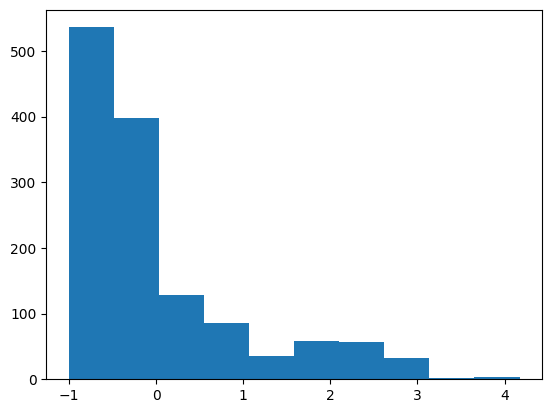

In [36]:
plt.hist(std_scaled_df['charges_std'] , bins=10)

###MinMax Scaling


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df[numerical_cols])

# Convert to DataFrame
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=[f'{col}_minmax' for col in numerical_cols])
minmax_scaled_df

,age_minmax,bmi_minmax,children_minmax,charges_minmax
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

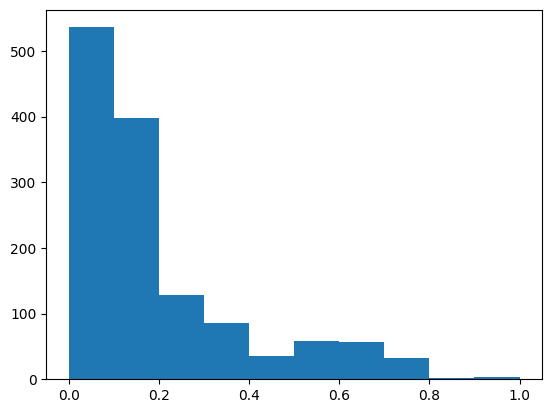

In [34]:
plt.hist(minmax_scaled_df['charges_minmax'] ,  bins=10)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

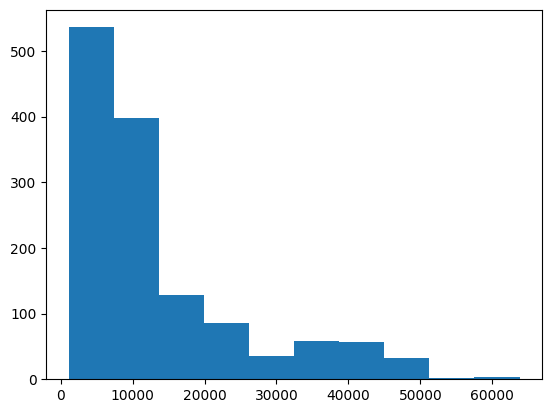

In [35]:
plt.hist(df['charges'] , bins=10)

#encoding

```
* Q: The dataset has categorical columns like sex, smoker, and region.
Use LabelEncoder and OneHotEncoder from sklearn.preprocessing to encode these features.

```



In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_df = df.copy()

###Label Encoding

In [9]:
le = LabelEncoder()

In [10]:
label_df['sex_label'] = le.fit_transform(label_df['sex'])

In [11]:
label_df['smoker_label'] = le.fit_transform(label_df['smoker'])

In [12]:
label_df

,age,sex,bmi,children,smoker,region,charges,sex_label,smoker_label
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


### One Hot encoding

In [13]:
df_encoded = pd.get_dummies(df , columns=['region'])
df_encoded

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,False,True


In [14]:
# df_encoded['region_northeast'] = le.fit_transform(label_df['region_northeast'])
df_encoded['region_northeast'] = np.where(df_encoded['region_northeast'] , 1 , 0)
df_encoded['region_northwest'] = np.where(df_encoded['region_northwest'] , 1 , 0)
df_encoded['region_southwest'] = np.where(df_encoded['region_southwest'] , 1 , 0)
df_encoded['region_southeast'] = np.where(df_encoded['region_southeast'] , 1 , 0)

In [15]:
df_encoded

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1
